In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.tensorboard.plugins import projector

In [30]:
#corpus_raw = 'He is the king . The king is royal . She is the royal  queen . '
corpus_raw = '''According to the documentation tensorflow is an open source library for performing machine learning operations . But the more specific definition of tensorflow is that its an open source library for numeric computation which understand the program in form of data flow diagrams . Even if you make a simple addition program there will be a graph ready for it and that graph can be accessed through the tensorboard api which comes along with tensorflow . Each graph node represents a computations and each edge represent relation between these nodes . Tensorflow was developed by Google’s brain team for machine learning research but now it is being widely used for general purpose machine learning tasks . One of the major reason behind its success is  its flexible nature that it could run even on our smartphones . And right know its community is very much active so if you are a machine learning enthusiast it’s the perfect time to put tensorflow in your bag as it’s very productive and has great demand in the technology market ranging from production to research .'''

corpus_raw = corpus_raw.lower()
words = []
for word in corpus_raw.split():
    if word != '.' and word != ',': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
print(words)
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words


{'and', 'machine', 'demand', 'much', 'as', 'market', 'each', 'purpose', 'it', 'widely', 'success', 'from', 'for', 'perfect', 'according', 'behind', 'an', 'between', 'its', 'understand', 'with', 'time', 'to', 'productive', 'flexible', 'these', 'which', 'can', 'flow', 'major', 'operations', 'but', 'more', 'it’s', 'there', 'make', 'smartphones', 'through', 'will', 'that', 'computation', 'numeric', 'technology', 'production', 'run', 'you', 'on', 'along', 'so', 'has', 'ranging', 'be', 'computations', 'a', 'google’s', 'great', 'open', 'tensorboard', 'could', 'library', 'right', 'program', 'one', 'definition', 'graph', 'the', 'community', 'now', 'data', 'addition', 'simple', 'research', 'comes', 'node', 'your', 'even', 'tasks', 'in', 'nodes', 'was', 'documentation', 'accessed', 'developed', 'brain', 'diagrams', 'general', 'know', 'represents', 'tensorflow', 'is', 'being', 'enthusiast', 'team', 'reason', 'our', 'api', 'represent', 'used', 'of', 'specific', 'form', 'performing', 'source', 'rela

In [43]:
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())


In [44]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

            


In [45]:

# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [46]:
metadata = "/home/madhusudan/environments/tensorboard/wordtovec/metadata.tsv"
print(data)

with open(metadata, 'w') as metadata_file:
    for row in words:
        #c = np.nonzero(y_train)[1][row]
        c = row
        print(c)
        metadata_file.write('{}\n'.format(c))
        

x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)



[['according', 'to'], ['according', 'the'], ['to', 'according'], ['to', 'the'], ['to', 'documentation'], ['the', 'according'], ['the', 'to'], ['the', 'documentation'], ['the', 'tensorflow'], ['documentation', 'to'], ['documentation', 'the'], ['documentation', 'tensorflow'], ['documentation', 'is'], ['tensorflow', 'the'], ['tensorflow', 'documentation'], ['tensorflow', 'is'], ['tensorflow', 'an'], ['is', 'documentation'], ['is', 'tensorflow'], ['is', 'an'], ['is', 'open'], ['an', 'tensorflow'], ['an', 'is'], ['an', 'open'], ['an', 'source'], ['open', 'is'], ['open', 'an'], ['open', 'source'], ['open', 'library'], ['source', 'an'], ['source', 'open'], ['source', 'library'], ['source', 'for'], ['library', 'open'], ['library', 'source'], ['library', 'for'], ['library', 'performing'], ['for', 'source'], ['for', 'library'], ['for', 'performing'], ['for', 'machine'], ['performing', 'library'], ['performing', 'for'], ['performing', 'machine'], ['performing', 'learning'], ['machine', 'for'], ['

In [47]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [49]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 1000
# train for n_iter iterations

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))
saver = tf.train.Saver()
saver.save(sess, "/home/madhusudan/environments/tensorboard/wordtovec/word.ckpt")
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = 'word2vec'
embedding.metadata_path = "/home/madhusudan/environments/tensorboard/wordtovec/metadata.tsv"
writer = tf.summary.FileWriter("/home/madhusudan/environments/tensorboard/wordtovec/my_graph",sess.graph)
projector.visualize_embeddings(tf.summary.FileWriter("/home/madhusudan/environments/tensorboard/wordtovec/"), config)
print ("Done")

vectors = sess.run(W1 + b1)
sess.close()

loss is :  9.22304
loss is :  8.94652
loss is :  8.70738
loss is :  8.49978
loss is :  8.31911
loss is :  8.16157
loss is :  8.024
loss is :  7.9037
loss is :  7.79835
loss is :  7.70594
loss is :  7.62473
loss is :  7.5532
loss is :  7.49004
loss is :  7.43408
loss is :  7.38434
loss is :  7.33995
loss is :  7.30014
loss is :  7.26428
loss is :  7.23182
loss is :  7.20225
loss is :  7.17519
loss is :  7.15028
loss is :  7.12721
loss is :  7.10574
loss is :  7.08564
loss is :  7.06672
loss is :  7.04884
loss is :  7.03185
loss is :  7.01563
loss is :  7.0001
loss is :  6.98517
loss is :  6.97077
loss is :  6.95683
loss is :  6.9433
loss is :  6.93015
loss is :  6.91732
loss is :  6.9048
loss is :  6.89254
loss is :  6.88053
loss is :  6.86875
loss is :  6.85717
loss is :  6.84578
loss is :  6.83456
loss is :  6.82352
loss is :  6.81262
loss is :  6.80187
loss is :  6.79126
loss is :  6.78077
loss is :  6.77041
loss is :  6.76017
loss is :  6.75003
loss is :  6.74
loss is :  6.73008
los

loss is :  5.0819
loss is :  5.07991
loss is :  5.07793
loss is :  5.07596
loss is :  5.07399
loss is :  5.07202
loss is :  5.07006
loss is :  5.06811
loss is :  5.06616
loss is :  5.06421
loss is :  5.06227
loss is :  5.06034
loss is :  5.05841
loss is :  5.05648
loss is :  5.05456
loss is :  5.05264
loss is :  5.05073
loss is :  5.04883
loss is :  5.04693
loss is :  5.04503
loss is :  5.04314
loss is :  5.04125
loss is :  5.03937
loss is :  5.03749
loss is :  5.03562
loss is :  5.03375
loss is :  5.03189
loss is :  5.03003
loss is :  5.02818
loss is :  5.02633
loss is :  5.02448
loss is :  5.02264
loss is :  5.02081
loss is :  5.01898
loss is :  5.01715
loss is :  5.01533
loss is :  5.01351
loss is :  5.0117
loss is :  5.00989
loss is :  5.00809
loss is :  5.00629
loss is :  5.0045
loss is :  5.00271
loss is :  5.00092
loss is :  4.99914
loss is :  4.99736
loss is :  4.99559
loss is :  4.99382
loss is :  4.99206
loss is :  4.9903
loss is :  4.98854
loss is :  4.98679
loss is :  4.985

loss is :  4.52533
loss is :  4.52449
loss is :  4.52365
loss is :  4.52282
loss is :  4.52198
loss is :  4.52115
loss is :  4.52032
loss is :  4.51949
loss is :  4.51866
loss is :  4.51783
loss is :  4.517
loss is :  4.51618
loss is :  4.51535
loss is :  4.51453
loss is :  4.51371
loss is :  4.51289
loss is :  4.51207
loss is :  4.51125
loss is :  4.51043
loss is :  4.50962
loss is :  4.5088
loss is :  4.50799
loss is :  4.50717
loss is :  4.50636
loss is :  4.50555
loss is :  4.50474
loss is :  4.50394
loss is :  4.50313
loss is :  4.50232
loss is :  4.50152
loss is :  4.50072
loss is :  4.49991
loss is :  4.49911
loss is :  4.49831
loss is :  4.49751
loss is :  4.49672
loss is :  4.49592
loss is :  4.49512
loss is :  4.49433
loss is :  4.49354
loss is :  4.49274
loss is :  4.49195
loss is :  4.49116
loss is :  4.49037
loss is :  4.48959
loss is :  4.4888
loss is :  4.48802
loss is :  4.48723
loss is :  4.48645
loss is :  4.48566
loss is :  4.48488
loss is :  4.48411
loss is :  4.483

In [37]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

In [38]:
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index


In [40]:

from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)


[[-0.78933942 -0.61395707]
 [ 0.62731192  0.7787681 ]
 [-0.97844257 -0.20651908]
 [-0.99764292  0.06861924]
 [-0.9235113   0.38357122]
 [-0.26561799 -0.96407836]
 [-0.07030869  0.99752528]
 [ 0.90539427 -0.4245718 ]
 [ 0.81394757  0.58093834]
 [ 0.86886499  0.49504911]
 [-0.90413634 -0.42724406]
 [ 0.54650522 -0.83745569]
 [ 0.67488073  0.73792682]
 [ 0.29715878  0.95482808]
 [ 0.97972813 -0.20033173]
 [-0.97116803 -0.23839602]
 [-0.95236453  0.30496196]
 [-0.93421668 -0.35670603]
 [-0.94114005  0.33801687]
 [-0.98954249  0.14424167]
 [ 0.9922252  -0.12445539]
 [ 0.38225966 -0.92405495]
 [ 0.99985833  0.01683225]
 [-0.68244432 -0.73093758]
 [ 0.57398389 -0.81886659]
 [-0.88130038 -0.4725565 ]
 [ 0.9540534  -0.29963662]
 [-0.51857655  0.85503121]
 [-0.69045351 -0.72337677]
 [-0.0062009   0.99998077]
 [ 0.94926038 -0.31449122]
 [ 0.36157777 -0.93234195]
 [-0.04301149 -0.99907458]
 [-0.17841049 -0.98395615]
 [-0.49646216  0.86805836]
 [-0.67267574 -0.73993739]
 [-0.96632674 -0.25731815]
 

{'and', 'machine', 'demand', 'much', 'as', 'market', 'each', 'purpose', 'it', 'widely', 'success', 'from', 'for', 'perfect', 'according', 'behind', 'an', 'between', 'its', 'understand', 'with', 'time', 'to', 'productive', 'flexible', 'these', 'which', 'can', 'flow', 'major', 'operations', 'but', 'more', 'it’s', 'there', 'make', 'smartphones', 'through', 'will', 'that', 'computation', 'numeric', 'technology', 'production', 'run', 'you', 'on', 'along', 'so', 'has', 'ranging', 'be', 'computations', 'a', 'google’s', 'great', 'open', 'tensorboard', 'could', 'library', 'right', 'program', 'one', 'definition', 'graph', 'the', 'community', 'now', 'data', 'addition', 'simple', 'research', 'comes', 'node', 'your', 'even', 'tasks', 'in', 'nodes', 'was', 'documentation', 'accessed', 'developed', 'brain', 'diagrams', 'general', 'know', 'represents', 'tensorflow', 'is', 'being', 'enthusiast', 'team', 'reason', 'our', 'api', 'represent', 'used', 'of', 'specific', 'form', 'performing', 'source', 'rela

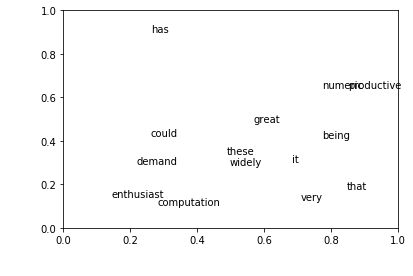

In [39]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()